In [185]:
import torch
from torch import nn
from torchvision import transforms, datasets
from torchvision.utils import make_grid
from preprocess import PadToSquare
# from model import get_model
from tools import imshow
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
DATA_DIR = '../data/raw_data'

In [188]:
# data_transforms = transforms.Compose([
#     PadToSquare(), 
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()])
from config import data_transforms

dataset = datasets.ImageFolder(DATA_DIR + '/train/', data_transforms['train'])

dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)
class_names = dataset.classes
print(len(dataset), len(dataset.classes))

30336 121


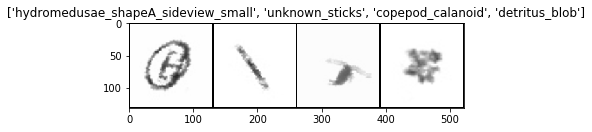

In [204]:
inputs, classes = next(iter(dataloader))
out = make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [177]:
print(class_names)

['acantharia_protist', 'acantharia_protist_big_center', 'acantharia_protist_halo', 'amphipods', 'appendicularian_fritillaridae', 'appendicularian_s_shape', 'appendicularian_slight_curve', 'appendicularian_straight', 'artifacts', 'artifacts_edge', 'chaetognath_non_sagitta', 'chaetognath_other', 'chaetognath_sagitta', 'chordate_type1', 'copepod_calanoid', 'copepod_calanoid_eggs', 'copepod_calanoid_eucalanus', 'copepod_calanoid_flatheads', 'copepod_calanoid_frillyAntennae', 'copepod_calanoid_large', 'copepod_calanoid_large_side_antennatucked', 'copepod_calanoid_octomoms', 'copepod_calanoid_small_longantennae', 'copepod_cyclopoid_copilia', 'copepod_cyclopoid_oithona', 'copepod_cyclopoid_oithona_eggs', 'copepod_other', 'crustacean_other', 'ctenophore_cestid', 'ctenophore_cydippid_no_tentacles', 'ctenophore_cydippid_tentacles', 'ctenophore_lobate', 'decapods', 'detritus_blob', 'detritus_filamentous', 'detritus_other', 'diatom_chain_string', 'diatom_chain_tube', 'echinoderm_larva_pluteus_brit

In [178]:
num_epochs = 1
batch_per_disp = 1

In [179]:
model = get_model('resnet18', [128, 128], len(class_names))
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = nn.CrossEntropyLoss()

In [180]:
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item() * inputs.size(0)
        epoch_acc += torch.sum(preds == labels.data)
        
        if batch % batch_per_disp == 0:
            batch_loss = loss.item()
            batch_acc = torch.sum(preds == labels.data).item() / inputs.size(0)
            print('batch %d: loss %.3f | acc %.3f' % (batch, batch_loss, batch_acc))
    
    epoch_loss = epoch_loss / len(dataset)
    epoch_acc = epoch_acc / len(dataset)

Epoch 0/0
----------
batch 0: loss 4.786 | acc 0.008
batch 1: loss 4.772 | acc 0.008
batch 2: loss 4.778 | acc 0.008
batch 3: loss 4.766 | acc 0.031
batch 4: loss 4.725 | acc 0.055
batch 5: loss 4.732 | acc 0.062
batch 6: loss 4.708 | acc 0.086
batch 7: loss 4.670 | acc 0.062
batch 8: loss 4.647 | acc 0.078
batch 9: loss 4.663 | acc 0.062
batch 10: loss 4.596 | acc 0.109
batch 11: loss 4.597 | acc 0.070
batch 12: loss 4.606 | acc 0.109
batch 13: loss 4.561 | acc 0.094
batch 14: loss 4.550 | acc 0.078
batch 15: loss 4.515 | acc 0.078
batch 16: loss 4.419 | acc 0.109
batch 17: loss 4.388 | acc 0.125
batch 18: loss 4.404 | acc 0.125
batch 19: loss 4.351 | acc 0.125
batch 20: loss 4.299 | acc 0.125
batch 21: loss 4.388 | acc 0.125
batch 22: loss 4.392 | acc 0.109
batch 23: loss 4.352 | acc 0.094
batch 24: loss 4.275 | acc 0.133
batch 25: loss 4.250 | acc 0.156
batch 26: loss 4.226 | acc 0.133
batch 27: loss 4.282 | acc 0.125
batch 28: loss 4.386 | acc 0.094
batch 29: loss 4.325 | acc 0.062